# COVID Datasets

## 20th April 2020

### Andrei Paleyes (apaleyes)

This notebook provides usage examples for Covid data set loaders stored in a python repository.

First step is to install the code.

In [1]:
%pip install git+https://github.com/DELVE-covid19/covid19_datasets.git

  Cloning https://github.com/DELVE-covid19/covid19_datasets.git to /tmp/pip-req-build-lwloj21y
  Running command git clone -q https://github.com/DELVE-covid19/covid19_datasets.git /tmp/pip-req-build-lwloj21y
  Created wheel for covid19-datasets: filename=covid19_datasets-0.1-py3-none-any.whl size=7360 sha256=a6d81dde443be18bb0c27b4f8ec5d70412712c939c2f9da65bb684926e610338
  Stored in directory: /tmp/pip-ephem-wheel-cache-ry_99b3k/wheels/60/cc/74/ea0d4a72a8727aca28a8cff3500db82510ac79d72dd1870b0e
Successfully built covid19-datasets
Note: you may need to restart the kernel to use updated packages.


Now some library files for visualising the data. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Just for info, we include some log messages in this usage notebook to show how the data sets are loading.

In [3]:
# optional - see log messages about datasets loading

import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

### Oxford Government Policy Tracker

The Oxford Government policy tracker available [here](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker) allows different government responses to Covid19 be loaded in. It can be loaded from the `covid19_datasets` as follows.

In [4]:
from covid19_datasets import OxfordGovernmentPolicyDataset

/home/andrei/.local/share/virtualenvs/covid-19-ERD70gzE/lib/python3.6/site-packages/pandas_datareader-0.8.1-py3.6.egg/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


You can create an instance of the data set by constructing a data set object.

In [5]:
ogp = OxfordGovernmentPolicyDataset()

INFO:covid19_datasets.oxford_government_policy:Loading dataset from https://ocgptweb.azurewebsites.net/CSVDownload
INFO:covid19_datasets.oxford_government_policy:Loaded


/home/andrei/.local/share/virtualenvs/covid-19-ERD70gzE/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


As an example, we'll look at policy information from South Africa. 

In [6]:
country = 'South Africa'

To share the policies, we'll use `matplotlib` to plot when different policies occured and compare it with epidemic dynamics

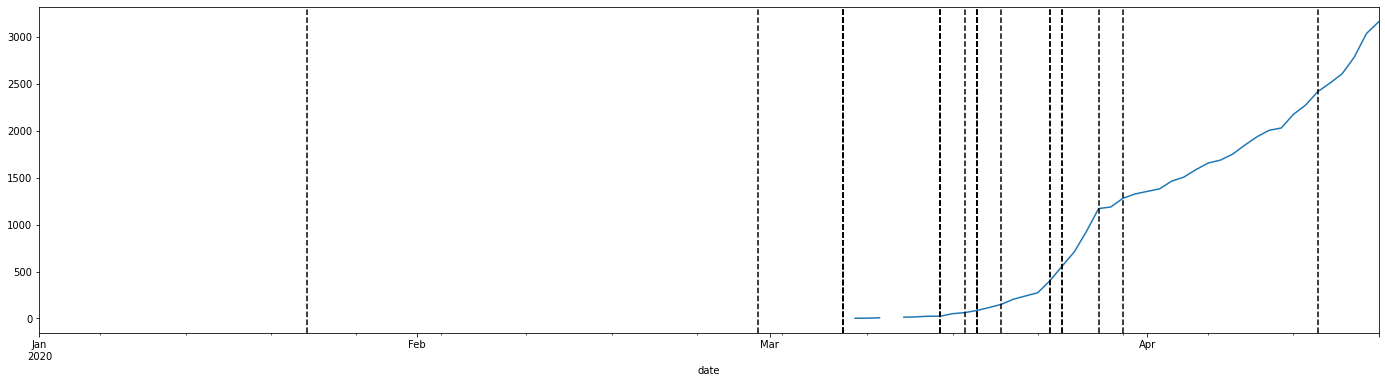

In [7]:
fig, ax = plt.subplots(figsize=(24, 6))
ogp.get_country_data(country).ConfirmedCases.plot(ax=ax)

policy_changes = ogp.get_country_policy_changes(country)

for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            ax.axvline(d, color='k', ls='--')

We can also cycle through the policy changes to print when different changes were made.

In [8]:
for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            print(f'Policy {c} changed on {d}')

Policy School closing changed on 2020-03-18 00:00:00
Policy Workplace closing changed on 2020-03-15 00:00:00
Policy Workplace closing changed on 2020-03-18 00:00:00
Policy Cancel public events changed on 2020-03-15 00:00:00
Policy Close public transport changed on 2020-03-18 00:00:00
Policy Public information campaigns changed on 2020-03-07 00:00:00
Policy Restrictions on internal movement changed on 2020-03-15 00:00:00
Policy Restrictions on internal movement changed on 2020-03-18 00:00:00
Policy International travel controls changed on 2020-01-23 00:00:00
Policy International travel controls changed on 2020-03-17 00:00:00
Policy Fiscal measures changed on 2020-03-24 00:00:00
Policy Fiscal measures changed on 2020-03-25 00:00:00
Policy Fiscal measures changed on 2020-03-30 00:00:00
Policy Monetary measures changed on 2020-02-29 00:00:00
Policy Monetary measures changed on 2020-03-07 00:00:00
Policy Monetary measures changed on 2020-03-20 00:00:00
Policy Monetary measures changed on 20

### World Bank Data

The world bank provides global development data for individual countries and bigger regions,. Available is data on population, economy, education, etc. More info at https://data.worldbank.org/.

In [9]:
from covid19_datasets import WorldBankDataBank, AGGREGATES

In [10]:
wbdb = WorldBankDataBank()

INFO:covid19_datasets.world_bank:Loading dataset


Here we plot population and population density for 20 most populated countries in the world, using matplotlib. Notice how AGGREGATES that represent world's regions must be dropped from the dataset, to leave only individual countries data.

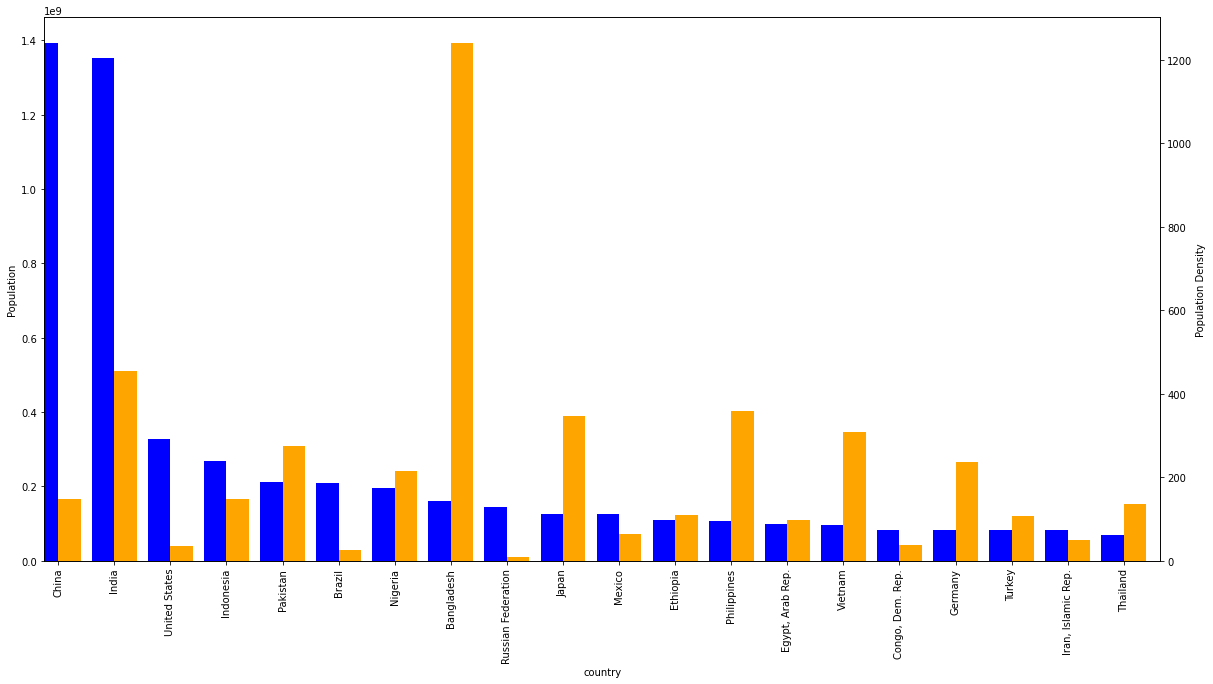

In [11]:
df = wbdb.get_data().drop(AGGREGATES).nlargest(20, "Population")

_, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df["Population"].plot(kind='bar', color='blue', ax=ax, position=1, width=0.4)
df["Population Density"].plot(kind='bar', color='orange', ax=ax2, position=0, width=0.4)

ax.set_ylabel('Population')
ax2.set_ylabel('Population Density')

plt.show()

### YouGov Behavioural Tracker

YouGov's behavioural tracker conducts surveys in more than 30 countries to understand how COVID-19 and governmental response to it affects human behavior. More info can be found here: https://yougov.co.uk/topics/international/articles-reports/2020/03/17/YouGov-international-COVID-19-tracker. The raw data can be seen in YouGov COVID-19 tracker [github page](https://github.com/YouGov-Data/covid-19-tracker/tree/master/data).

In [12]:
from covid19_datasets import YouGovBehaviouralTracker

In [13]:
ygbt = YouGovBehaviouralTracker()

INFO:covid19_datasets.yougov_behavioural_tracker:Loading dataset
ERROR:covid19_datasets.yougov_behavioural_tracker:ERROR WITH finland
INFO:covid19_datasets.yougov_behavioural_tracker:Loaded


Here we plot information on mask usage statistics.

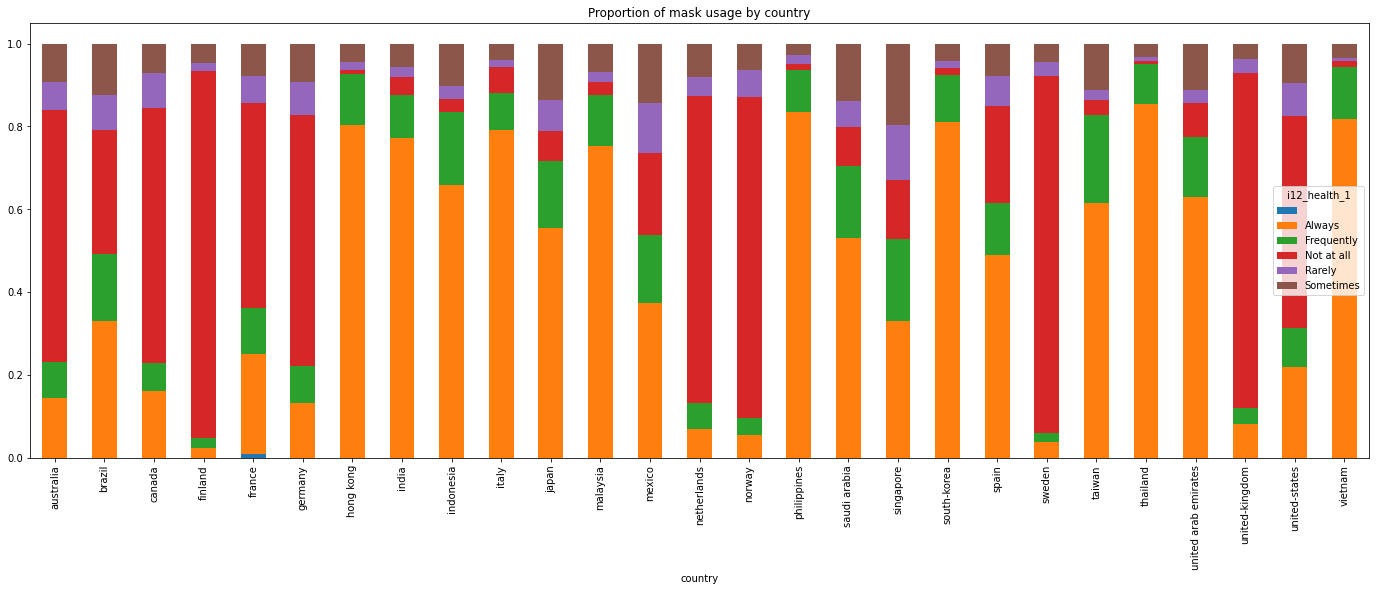

In [14]:
fig, ax = plt.subplots(figsize=(24, 8))
mask_question = 'i12_health_1'
counts = ygbt.data[['country', mask_question, 'RecordNo']].groupby(['country', mask_question]).count().unstack()
normalised_counts = counts.div(counts.sum(axis=1), axis=0)
normalised_counts['RecordNo'].plot(kind='bar', stacked=True, ax=ax)
plt.title('Proportion of mask usage by country');

### ACAPS Government Measures

The ACAPS #COVID19 Government Measures Dataset puts together all the measures implemented by governments worldwide in response to the Coronavirus pandemic. Data collection includes secondary data review.

In [15]:
from covid19_datasets import AcapsGovernmentMeasures

In [18]:
agm = AcapsGovernmentMeasures()

INFO:covid19_datasets.acaps_government_measures:Loading dataset from https://www.acaps.org/sites/acaps/files/resources/files/20200416_acaps_-_covid-19_goverment_measures_dataset_v8.xlsx
INFO:covid19_datasets.acaps_government_measures:Loaded


We can see all categories of interventions, and all individual measures

In [53]:
print("Intervention categories: \n  * " + '\n  * '.join(agm.get_intervention_categories()))
print()
print("Individual measures: \n  * " + '\n  * '.join(agm.get_measures()))

Intervention categories: 
  * Public health measures
  * Governance and socio-economic measures
  * Social distancing
  * Movement restrictions
  * Lockdown
  * Humanitarian exemption

Individual measures: 
  * Health screenings in airports and border crossings
  * Introduction of isolation and quarantine policies
  * Awareness campaigns
  * Emergency administrative structures activated or established
  * Limit public gatherings
  * Border closure 
  * Schools closure 
  * Strengthening the public health system
  * Limit product imports/exports
  * Border checks 
  * International flights suspension
  * Surveillance and monitoring
  * Other public health measures enforced
  * Domestic travel restrictions
  * State of emergency declared
  * General recommendations
  * Partial lockdown
  * Checkpoints within the country
  * Economic measures
  * Curfews
  * Changes in prison-related policies
  * Public services closure 
  * Military deployment
  * Full lockdown
  * Visa restrictions
  * 

As a simple usage example, we can plot the number of countries that has introduced some form of lockdown vs the number of countries that didn't.

In [46]:
lockdown_countries_count = agm.get_data()[agm.get_data().MEASURE.str.contains("lockdown")].COUNTRY.unique().shape[0]
total_countries = agm.get_data().COUNTRY.unique().shape[0]
no_lockdown_countries_count = total_countries - lockdown_countries_count

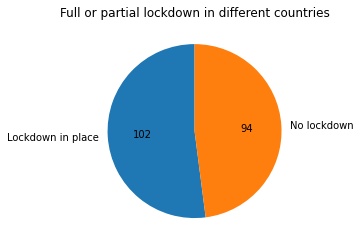

In [52]:
plt.pie([lockdown_countries_count, no_lockdown_countries_count], labels=['Lockdown in place', 'No lockdown'],
        autopct = lambda p: '{:.0f}'.format(p * total_countries / 100), startangle=90);
plt.title('Full or partial lockdown in different countries');